# Echo
## Idee
Ähnlich der Echoortung bei Tieren soll ein kurzes Tonsignal gesendet werden. Mit einem Mikrofon wird das Signal und dessen Echo aufgezeichnet. Die Audiosignale soll in Spektrogramme umgewandelt werden, welche anschließend als Trainingsdaten für verschiedene KI-Modelle dienen sollen.
Mögliche Einsatzgebiete sind:
- Objektklassifikation
- Raumklassifikation (aufgrund bestimmter resonanzeigenschaften der Räume)

## Signal generieren, aufzeichnen und Spektrogram erzeugen
Wie bereits beschrieben soll ein akustisches Signal generiert werden gleichzeitig das echo aufgenommen werden. Das Signal wird im folgenden bei eine Sample Rate von 96kHz generiert und aufgezeichnet. Die Frequenz des Signals liegt mit 25kHz knapp im Ultraschallbereich. Aufgrund der nicht wirklich geeigneten Laptoplautsprecher hört man zu Beginn und am Ende des Signals ein Knacken. Das Knacken wird auch in der Audiowellendarstellung und im Spektrogramm sichtbar. Abgesehen davon wäre eventuell eine höhere Abtastrate sinnvoll, da das echo ja nur um wenige ms verschoben zurück kommt. Jedoch ist 96kHz die höchste Abtastrate die mein Laptop her gibt.

In [1]:
import sounddevice as sd
import numpy as np
import time
import librosa
import librosa.display
from PIL import Image
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import os
import glob

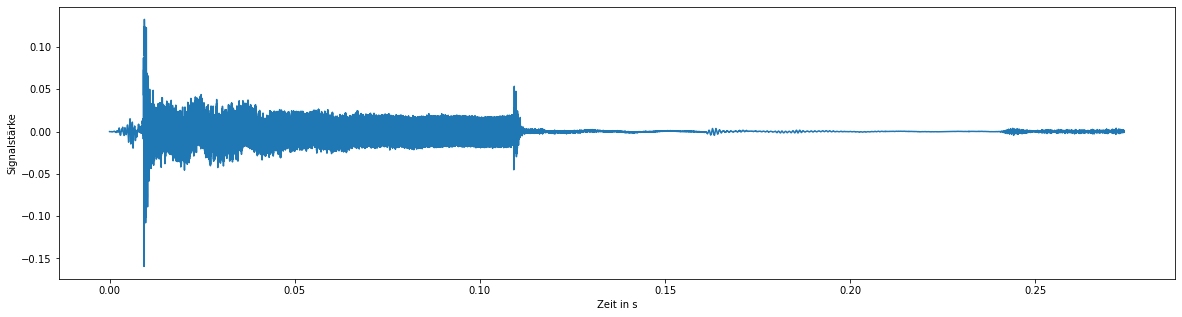

In [2]:
#sd.query_devices()
sd.default.device =  0,1
time.sleep(0.5)
fs=96000  #sample rate muss je nach Hardware entsprechend gewählt werden.
duration=0.1
f=25000
sine = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)
samples=np.concatenate((sine, [0]*int(fs*duration)*2), axis=None)
for i in range(2):
    samples=np.concatenate((samples, sine), axis=None)
    samples=np.concatenate((samples, [0]*int(fs*duration*2)), axis=None)


rec=sd.playrec(samples,fs,channels=1)
rec=rec.reshape((samples.shape[0]))[60100:87000]
time.sleep(1)
#fig = go.Figure(data=go.Scatter(y=rec,x=np.array(range(len(rec)))/fs))
#fig.update_layout(
#    title="Aufgenommmenes Audiosignal:",
#    xaxis_title="Zeit in s",
#    yaxis_title="Signalstärke",
#)
#fig.show()
plt.figure(figsize=(20,5))
plt.plot(np.array(range(len(rec)))/fs,rec,)
plt.xlabel('Zeit in s')
plt.ylabel('Signalstärke')
plt.show()

Das Ultraschallsignal dauert 100ms. Am Anfang und am Ende ist ein Spitze der Signalstärke zu erkennen, welche durch das Knacken der Lautsprecher erzeigt wurde

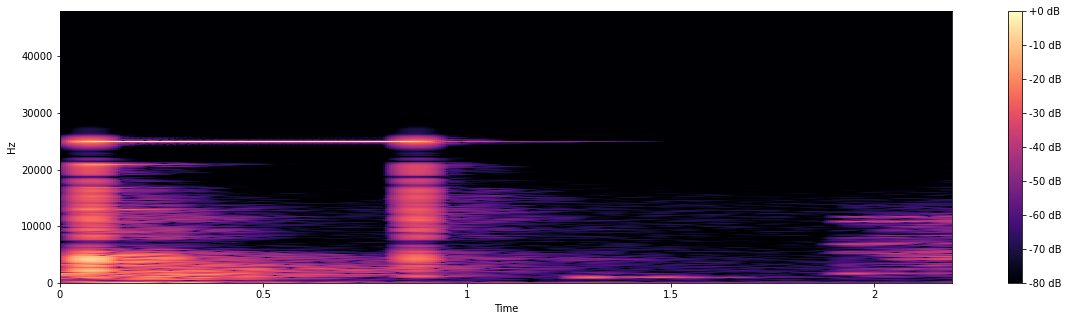

In [3]:
plt.figure(figsize=(20,5))
D=np.abs(librosa.stft(rec,n_fft=2048,hop_length=64))
DB=librosa.amplitude_to_db(D,ref=np.max)
librosa.display.specshow(DB,sr=96000,x_axis="time",y_axis="linear")
plt.colorbar(format="%+2.0f dB")
plt.show()

Auch im Spektrogram ist das knacken deutlich zu sehen, da es sich am Ende und am Anfang des Signals über viele Frequenzbereiche hinwegzieht.
## Trainingsdaten erzeugen


In [4]:
from PIL import Image
from matplotlib.pyplot import imshow
import os
import glob

def generate_new_echo(fs=96000,duration=0.1,f=25000):
    time.sleep(1)
    sine = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)
    samples=np.concatenate((sine, [0]*int(fs*duration)*2), axis=None)
    
    for i in range(2):
        samples=np.concatenate((samples, sine), axis=None)
        samples=np.concatenate((samples, [0]*int(fs*duration*2)), axis=None)


    rec=sd.playrec(samples,fs,channels=1)
    rec=rec.reshape((samples.shape[0]))[60050:87000]
    time.sleep(1)
    return rec

def get_next_img_name(path):
    maxindex=0
    for x in glob.glob(path+"*.png"):
        index=int(x.split("/")[-1].split(".")[0])
        if index>=maxindex:
            maxindex=index
    return path+str(maxindex+1)+".png"
    
def img_from_audio(rec,label):
    path = "data/"+str(label)+"/"
    try:os.mkdir("data")
    except OSError:print ()
    try:os.mkdir(path)
    except OSError:print ()

    
    
    D=np.abs(librosa.stft(rec,n_fft=2048,hop_length=64))
    DB=librosa.amplitude_to_db(D,ref=np.max)
    
    
    img=np.interp(DB[250:600,:400], (DB[250:600,:400].min(), DB[250:600,:400].max()), (0, 255))
    img = Image.fromarray(np.uint8(img) , 'L')
    img_path=get_next_img_name(path)
    img.save(img_path)
    print(img_path+" gespeichert!")
    #imshow(img,cmap='gray')
    #plt.axis('off')
    


In [7]:
time.sleep(1)
for i in range(100):
    img_from_audio(generate_new_echo(),label="kueche")



data/kueche/201.png gespeichert!


data/kueche/202.png gespeichert!


data/kueche/203.png gespeichert!


data/kueche/204.png gespeichert!


data/kueche/205.png gespeichert!


data/kueche/206.png gespeichert!


data/kueche/207.png gespeichert!


data/kueche/208.png gespeichert!


data/kueche/209.png gespeichert!


data/kueche/210.png gespeichert!


data/kueche/211.png gespeichert!


data/kueche/212.png gespeichert!


data/kueche/213.png gespeichert!


data/kueche/214.png gespeichert!


data/kueche/215.png gespeichert!


data/kueche/216.png gespeichert!


data/kueche/217.png gespeichert!


data/kueche/218.png gespeichert!


data/kueche/219.png gespeichert!


data/kueche/220.png gespeichert!


data/kueche/221.png gespeichert!


data/kueche/222.png gespeichert!


data/kueche/223.png gespeichert!


data/kueche/224.png gespeichert!


data/kueche/225.png gespeichert!


data/kueche/226.png gespeichert!


data/kueche/227.png gespeichert!


data/kueche/228.png gespeichert!


data/kueche/229.pn